Accuracy on random data: 65.00%


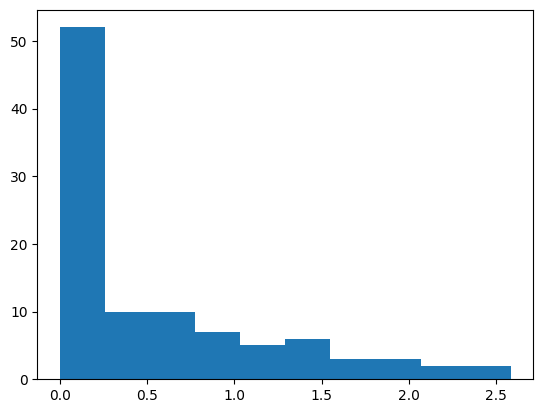

In [47]:
import pickle
import random
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

MAX_EPOCHS_FACTOR = 300


# Function to generate random patterns and labels
def generate_random_data(num_samples, num_features, distribution="uniform"):
    # X = np.random.randint(0, 2, (num_samples, num_features))  # Random binary patterns
    X = np.random.rand(num_samples, num_features)
    y = np.random.choice([-1, 1], num_samples)  # Random binary labels (-1 or 1)
    return X, y


# Perceptron model
class Perceptron:
    def __init__(self, num_features, learning_rate=0.00005, max_epochs=1000):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = num_features * MAX_EPOCHS_FACTOR  # max_epochs

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias >= 0 else -1

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if target != prediction:
                    self.weights += self.learning_rate * xi * target
                    # sign constrained
                    self.weights[self.weights < 0] = 0
                    self.bias += self.learning_rate * target
                    errors += 1
            # Stop if no errors in epoch (converged)
            if errors == 0:
                # print(f"Converged after {epoch + 1} epochs")
                break
        else:
            # print("Reached maximum epochs without full convergence")
            pass

    def score(self, X, y):
        predictions = [self.predict(xi) for xi in X]
        accuracy = np.mean(predictions == y)
        return accuracy


# Parameters
num_samples = 200  # Number of random patternss
num_features = 100  # Number of features per pattern

# Generate random data
X, y = generate_random_data(num_samples, num_features)

# Initialize Perceptron and train
perceptron = Perceptron(num_features=num_features, learning_rate=0.1, max_epochs=100)
perceptron.fit(X, y)

# Evaluate performance
accuracy = perceptron.score(X, y)
print(f"Accuracy on random data: {accuracy * 100:.2f}%")

plt.hist(perceptron.weights, bins=10)
plt.show()


In [48]:
class TrainPerceptron:
    def __init__(self, num_samples, num_features):
        self.num_samples = num_samples
        self.num_features = num_features
        self.perceptron = Perceptron(
            num_features=num_features, learning_rate=0.1, max_epochs=100
        )

    def train(self):
        X, y = generate_random_data(self.num_samples, self.num_features)
        self.perceptron.fit(X, y)
        return self.perceptron.score(X, y)


repeat = 10
average_accuracy = []
for _ in range(repeat):
    train_perceptron = TrainPerceptron(num_samples=20, num_features=10)
    accuracy = train_perceptron.train()
    average_accuracy.append((accuracy == 1))
print(f"Average accuracy: {np.mean(average_accuracy) * 100:.2f}%")


Average accuracy: 0.00%


In [49]:
import numpy as np
from joblib import Parallel, delayed


def single_trial(num_samples, num_features):
    train_perceptron = TrainPerceptron(
        num_samples=num_samples, num_features=num_features
    )
    accuracy = train_perceptron.train()
    return accuracy == 1


def get_success_rate(num_samples=20, num_features=10, repeat=20):
    # Run trials in parallel using joblib

    results = Parallel(n_jobs=8)(
        delayed(single_trial)(num_samples, num_features) for _ in range(repeat)
    )

    results = np.array(results)
    return (np.mean(results), np.std(results) / np.sqrt(repeat), results.tolist())


------------------------
N = 10, P = 8, success rate = 0.75
N = 10, P = 9, success rate = 0.7
N = 10, P = 10, success rate = 0.7
N = 10, P = 11, success rate = 0.5
N = 10, P = 12, success rate = 0.6
N = 10, P = 13, success rate = 0.25
N = 10, P = 14, success rate = 0.25
[[10, 1.1712737686015087, 0.07591475578571141]]
------------------------
N = 20, P = 16, success rate = 0.8
N = 20, P = 17, success rate = 0.65
N = 20, P = 18, success rate = 0.8
N = 20, P = 19, success rate = 0.55
N = 20, P = 20, success rate = 0.45
N = 20, P = 21, success rate = 0.65
N = 20, P = 22, success rate = 0.35
N = 20, P = 23, success rate = 0.25
N = 20, P = 24, success rate = 0.2
[[20, 1.0396053098987295, 0.05536950920911993]]
------------------------
N = 50, P = 40, success rate = 1.0
N = 50, P = 42, success rate = 0.7
N = 50, P = 44, success rate = 0.75
N = 50, P = 46, success rate = 0.65
N = 50, P = 48, success rate = 0.45
N = 50, P = 50, success rate = 0.35
N = 50, P = 52, success rate = 0.55
N = 50, P = 

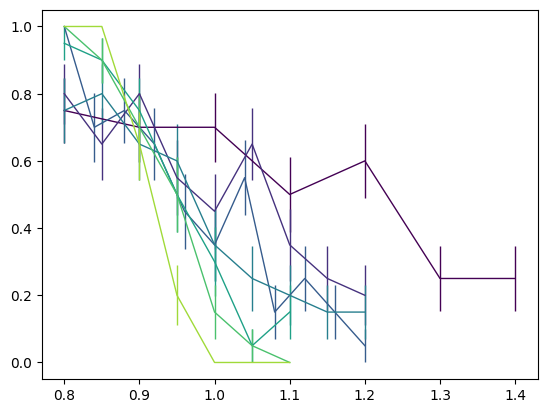

In [50]:
# plot capacity


success_rate = defaultdict(list)
experi = {}
# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}
capacity = []
for N in N_values:
    experi[N] = {}
    print("------------------------")

    if N == 10:
        min_N, max_N, step = 8, 15, 1

    elif N < 200:
        min_N, max_N, step = int(N * 0.8), int(N * 1.2) + 1, int(N * 0.05)
    elif N < 500:
        min_N, max_N, step = int(N * 0.8), int(N * 1.1) + 1, int(N * 0.05)
    else:
        min_N, max_N, step = int(N * 0.8), int(N * 1.1) + 1, int(N * 0.05)
    for P in range(min_N, max_N, step):
        ave_success_rate, std_success_rate, exp = get_success_rate(
            num_samples=P, num_features=N
        )
        experi[N][P] = exp
        print("N = {}, P = {}, success rate = {}".format(N, P, ave_success_rate))

        success_rate[N].append((P, ave_success_rate, std_success_rate))
    with open(
        "perceptron_sign_constrained_experi_max_iter_factor_{}.pkl".format(
            MAX_EPOCHS_FACTOR
        ),
        "wb",
    ) as f:
        pickle.dump(experi, f)

    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * len(experi[N][P])
            psedoY += random.choices(experi[N][P], k=len(experi[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N],
    )
    print(capacity)
    with open("perceptron_sign_constrained_capacity.pkl", "wb") as f:
        pickle.dump(capacity, f)

    # plt.errorbar(
    #     [np.array(psedoC).mean()],
    #     [0.5],
    #     xerr=np.array(psedoC).std(),
    #     fmt="o",
    #     linewidth=2,
    #     capsize=2,
    #     color=colors[N],
    # )
print(success_rate)


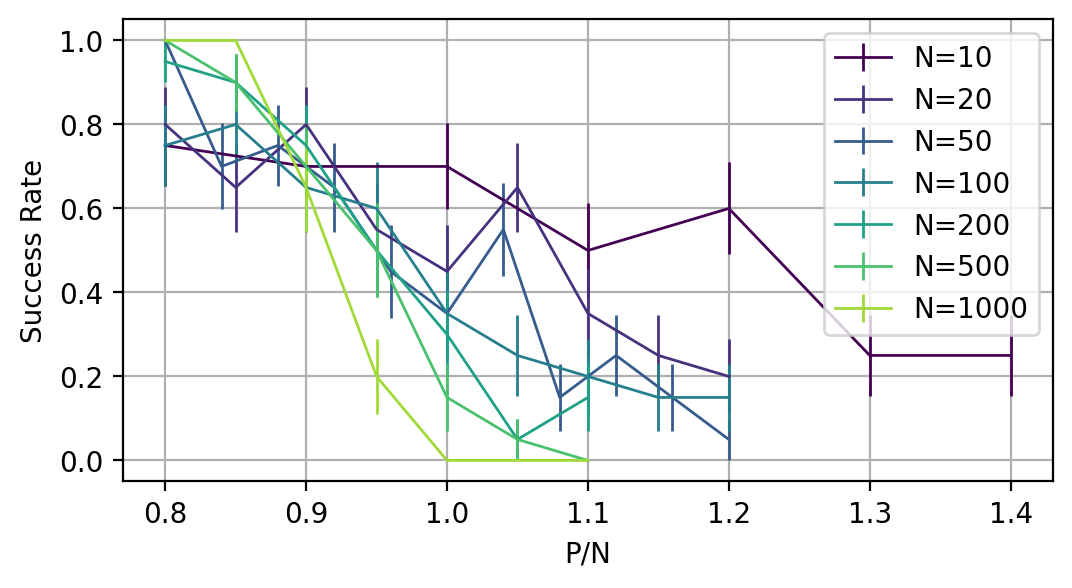

In [51]:
with open("perceptron_sign_constrained_experi.pkl", "rb") as f:
    experi = pickle.load(f)
# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}
capacity = []
plt.figure(figsize=(6, 3), dpi=200)
for N in N_values:
    sample = 5
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * len(experi[N][P])
            psedoY += random.choices(experi[N][P], k=len(experi[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N],
    )
plt.legend()
plt.xlabel("P/N")
plt.ylabel("Success Rate")
plt.grid(True)
# plt.savefig("perceptron_success_rate_uniform_input.pdf", dpi=300)
plt.show()

[[10, 1.1285689900696139, 0.10085726200274522], [20, 1.0726730600208703, 0.031191155126540332], [50, 0.9842921117179626, 0.02316671926103604], [100, 0.9223891933820776, 0.057635765040201306], [200, 0.9769403942857361, 0.03733659397148452], [500, 0.94643688622869, 0.0204704994227492], [1000, 0.8726839933616792, 0.021779741213235757]]


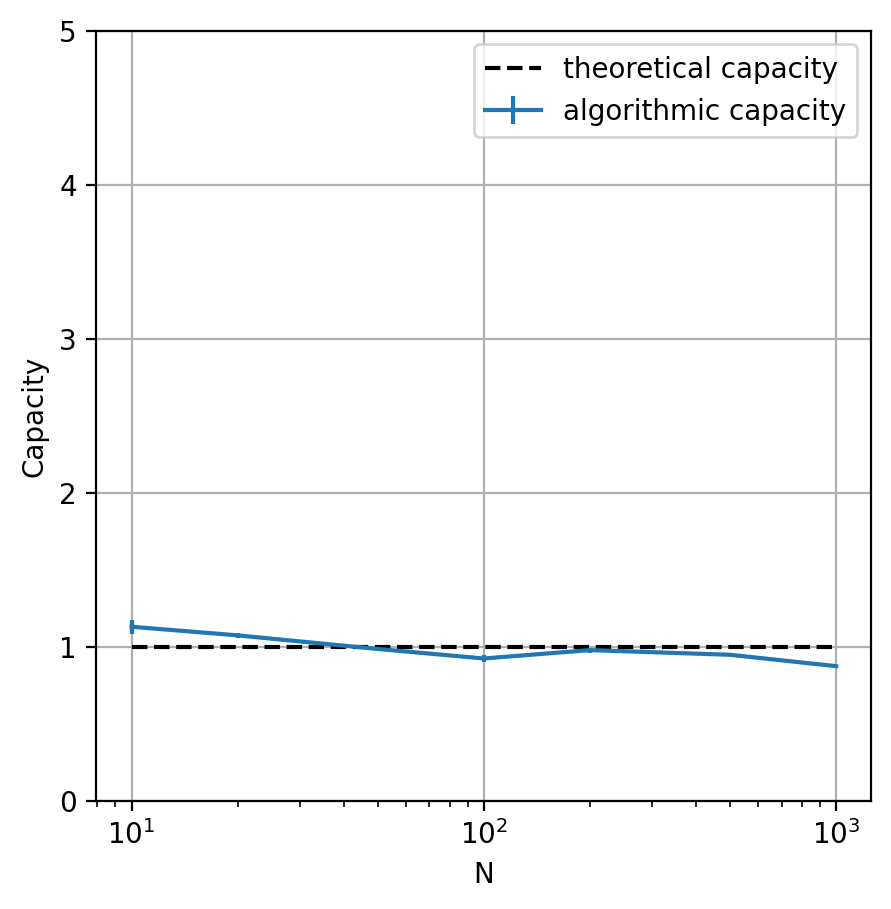

In [52]:
plt.figure(figsize=(5, 5), dpi=200)
print(capacity)
N = [c[0] for c in capacity]
C = [c[1] for c in capacity]
err = [c[2] / np.sqrt(5) for c in capacity]
plt.errorbar(
    N,
    C,
    yerr=err,
    # label="N=" + str(N),
    # color=colors[N],
    label="algorithmic capacity",
)
plt.plot(
    N,
    np.ones((len(N),)) * 1,
    label="theoretical capacity",
    color="k",
    linestyle="--",
)
plt.xscale("log")
plt.ylim([0, 5])
plt.legend()
plt.xlabel("N")
plt.ylabel("Capacity")
plt.grid(True)
plt.savefig("perceptron_capacity_sign_constrained_gaussian.pdf", dpi=300)
plt.show()
